# Welcome!
This is effectively project 2 part 1 : webscraping. There won't be many notes throughout this notebook because most of it is self explanatory : I scraped this from here.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os
from selenium.webdriver.common.by import By
import string
from time import sleep
import matplotlib.pyplot as plt
import scipy.stats as stat
from statsmodels.graphics.gofplots import qqplot

In [2]:
def country_name_consistency(df) :
    """
    Input : dataframe with a 'Countries' column, default index
    Output : dataframe with correct country names and 'Countries' as the index
    """
    df['Countries'] = df.Countries.str.strip()
    df = df.set_index('Countries')
    df = df.rename({"Côte d'Ivoire":'Ivory Coast',
               'Korea, South': 'South Korea',
               'Cabo Verde':'Cape Verde',
               'Micronesia, Federated States of':'F.S. Micronesia',
               'Slovak Republic':'Slovakia',
               'Gambia, The':'Gambia',
               'Congo, Democratic Republic of the':'Democratic Republic of the Congo',
               'Congo, Republic of the':'Congo',
               'Sao Tome and Principe':'São Tomé and Príncipe',
               'Bahamas, The':'Bahamas',
               'North Macedonia':'Macedonia',
               'Republic of the Congo':'Democratic Republic of the Congo',
               'The Gambia':'Gambia',
               'Burma - Myanmar':'Myanmar',
               'Republic of Macedonia':'Macedonia',
               'United States of America' : 'United States',
               'Russian Federation':'Russia',
               'Republic of Korea':'South Korea',
               'Republic of Moldova':'Moldova',
               'Bolivia (Plurinational State of)':'Bolivia',
               "Democratic People's Republic of Korea":'North Korea',
               'Czechia' : 'Czech Republic',
               'United Republic of Tanzania' : 'Tanzania',
               'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom',
               'Viet Nam' : 'Vietnam',
               'Republic of North Macedonia':'Macedonia',
               'Brunei Darussalam' : 'Brunei',
               'Iran (Islamic Republic of)' : 'Iran',
               'Sao Tome and Principe' : 'São Tomé and Príncipe',
               'Syrian Arab Republic' : 'Syria',
               'Micronesia, Fed. Sts.':'F.S. Micronesia',
               'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
               "Cote d'Ivoire" : 'Ivory Coast',
               'Eswatini (Swaziland)':'Eswatini',
               'Federated States of Micronesia' : 'F.S. Micronesia',
               'Republic of the Congo' : 'Congo',
               'The Bahamas' : 'Bahamas',
               'Swaziland':'Eswatini',
               'Micronesia (Federated States of)' : 'F.S. Micronesia',
               'The former Yugoslav Republic of Macedonia' : 'Macedonia',
               'The Former Yugoslav Republic of Macedonia' : 'Macedonia',
               'Venezuela (Bolivarian Republic of)' : 'Venezuela',   
               'Czech Rep.' : 'Czech Republic',
               'Dominican Rep.' : 'Dominican Republic',
               'Slovak Rep.' : 'Slovakia',
               'Yemen, Rep.' : 'Yemen',
               'Congo, Dem. R.' : 'Democratic Republic of the Congo',
               'Congo, Rep. of' : 'Congo',
               'Kyrgyz Republic' : 'Kyrgyzstan',
               'Pap. New Guinea' : 'Papua New Guinea',
               'Korea (Republic of)' : 'South Korea',
               'Eswatini (Kingdom of)' : 'Eswatini',
               'Moldova (Republic of)' : 'Moldova',
               'Micronesia (Federated States of)' : 'F.S. Micronesia',
               'Congo (Democratic Republic of the)' : 'Democratic Republic of the Congo',
               'Tanzania (United Republic of)' : 'Tanzania',
               'Korea' : 'South Korea',
               "Dem. People's Rep. Korea" : 'North Korea',
               "Dem. Rep. Congo" : 'Democratic Republic of the Congo',
               'Lao' : 'Laos',
               'Lao PDR' : 'Laos',
               'São Tomé and Principe' : 'São Tomé and Príncipe',
               'Republic of Ireland' : 'Ireland',
               'Timor Leste' : 'Timor-Leste',
               'Democratic Republic of Congo' : 'Democratic Republic of the Congo',
               'Burma' : 'Myanmar',
               'Micronesia' : 'F.S. Micronesia',
               'Korea, North' : 'North Korea',
               'Western Samoa' : 'Samoa',
               'Bolivarian Republic of Venezuela' : 'Venezuela',
               'Plurinational State of Bolivia' : 'Bolivia',
               'Republic of the Gambia' : 'Gambia',
               "Lao People's Democratic Republic" : 'Laos',
               'Islamic Republic of Iran' : 'Iran',
               'Saudi Arabia, Kingdom of' : 'Saudi Arabia',
               'Venezuela, Bolivarian Republic of' : 'Venezuela',
               'Kuwait, the State of' : 'Kuwait',
               'Korea, Republic of' : 'South Korea',
               'Bolivia, Plurinational State of' : 'Bolivia',
               'Côte d’Ivoire' : 'Ivory Coast',
               'Somalia (South Central)' : 'Somalia',
               'Korea, Rep.' : 'South Korea',
               "Korea, Dem. People's Rep." : 'North Korea',
               'Congo, Dem. Rep.' : 'Democratic Republic of the Congo',
               'Congo, Rep.' : 'Congo',
               'Macedona, FYR' : 'Macedonia',
               'Egypt, Arab Rep.' : 'Egypt',
               'Iran, Islamic Rep.' : 'Iran',
               'Venezuela, RB' : 'Venezuela',
               'D.R. of the Congo' : 'Democratic Republic of the Congo',
               'Serbia and Montenegro' : 'Serbia',
               'D.R. of the Congo' : 'Democratic Republic of the Congo',
               'Rep. of the Congo' : 'Congo',
               'East Timor' : 'Timor-Leste',
               'U.A.E.' : 'United Arab Emirates',
               'Macedonia, FYR' : 'Macedonia',
               'Republic of Congo' : 'Congo',
               'Congo, Democratic Republic of' : 'Democratic Republic of the Congo'
                    })
    return df

In [3]:
# tables = pd.read_html('https://countryeconomy.com/demography/world-happiness-index')

# happiness_index = tables[0]
# happiness_index = happiness_index.drop('World Happiness Index.1',axis=1)
# happiness_index['Countries'] = happiness_index.Countries.str.slice(0,-3).str.strip()
# happiness_index['World Happiness Ranking'] = happiness_index['World Happiness Ranking'].str.slice(0,-1)
# happiness_index = country_name_consistency(happiness_index)

# happiness_index.columns = ['a','happy','b']
# happiness_index = happiness_index.drop(['a','b'],axis=1)

In [4]:
#get suicide rates from 2016
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate')

suicide_rates = tables[2]
suicide_rates = suicide_rates.rename(columns={'Country':'Countries'})
#also, there is no recent data for Swaziland, Hong Kong, Taiwan, or Palestine. They will be dropped.
suicide_rates.columns = suicide_rates.columns.map(''.join)
suicide_rates = (suicide_rates.drop(['Both sexesrank'*2,
                                     'MalesRank',
                                     'FemalesRank',
                                     'Male:Femaleratio'*2],axis = 1)
                 .rename(columns = {'Countries'*2:'Countries','Both sexes'*2:'BothSexes','Continent'*2 : 'Continent'}))

#this is just to remove some special tags
country_names = []
for country in suicide_rates.Countries :
    if country[-12:] == (' (more info)') :
        country = country[0:-12]
    if country[-3:] == '[a]' :
        country = country[0:-3]
    country_names.append(country)
cols = country_names


suicide_rates['Countries'] = cols
suicide_rates = suicide_rates.set_index('Countries')
#full = suicide_rates.join(happiness_index,on='Countries')

In [5]:
#Get happiness data

In [6]:
tables = pd.read_html('https://countryeconomy.com/demography/world-happiness-index')

happiness_index = tables[0]
happiness_index = happiness_index.drop('World Happiness Index.1',axis=1)
happiness_index['Countries'] = happiness_index.Countries.str.slice(0,-3).str.strip()
happiness_index['World Happiness Ranking'] = happiness_index['World Happiness Ranking'].str.slice(0,-1)
happiness_index = country_name_consistency(happiness_index)

happiness_index.columns = ['a','happy','b']
happiness_index = happiness_index.drop(['a','b'],axis=1)

In [7]:
full = suicide_rates.join(happiness_index,on='Countries')

In [8]:
#get most recent data by country
docs = pd.read_csv('data.csv').sort_values(by='Year',ascending=False).groupby('Country').first()

In [9]:
docs = docs.reset_index()
docs = docs.rename(columns={'Country':'Countries','Medical doctors (per 10 000 population)':'doc_ratio'})
docs = country_name_consistency(docs)
docs = docs.drop('Year',axis=1)

In [10]:
full = full.join(docs,on='Countries')
full = full.rename(columns = {'Medical doctors (per 10 000 population)':'doc_ratio'})

In [11]:
#adding poverty data

In [12]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_percentage_of_population_living_in_poverty')
poverty = tables[1]
poverty = poverty[['Country','CIA[8]']]
poverty = poverty.rename(columns = {'CIA[8]':'below_pov_line','Country':'Countries'})
poverty['below_pov_line']=poverty.below_pov_line.str.strip('%').astype(float)
poverty = poverty.set_index('Countries')

In [13]:
full = full.join(poverty,on='Countries')

In [14]:
#adding GDP

In [15]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')

gdp = tables[3]
gdp = gdp.drop('Rank',axis=1)
gdp = gdp.rename(columns = {'Country/Territory':'Countries','GDP(US$million)':"gdp"})
gdp = gdp[gdp.Countries!='World']

c_names = []
for country in gdp.Countries :
    split_list = country.split('[')
    good_name = split_list[0]
    c_names.append(good_name)
gdp.Countries = c_names
gdp = country_name_consistency(gdp)

In [16]:
full = full.join(gdp,on='Countries')

#I decided not to hard code, but this was the data that was missing for unknown reasons

# full.at['Eswatini','gdp'] = 4756
# full.at['Eritrea','gdp'] = 6722
# full.at['Cuba','gdp'] = 96851
# full.at['Yemen','gdp'] = 28524
# full.at['South Sudan','gdp'] = 3980
# full.at['Venezuela','gdp'] = 96328
# full.at['Syria','gdp'] = 77460
#these come from a diff dataset

In [17]:
#adding GDP per capita

In [18]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita')

gdp_pp = tables[4]
gdp_pp = gdp_pp.drop(['Rank','Year'],axis=1)
gdp_pp = gdp_pp.rename(columns = {'Country/Territory':'Countries','Int$':'gdppp'})
gdp_pp = country_name_consistency(gdp_pp)
full = full.join(gdp_pp,on='Countries')


In [19]:
#adding unemployment rate

In [20]:
tables = pd.read_html('https://tradingeconomics.com/country-list/unemployment-rate')

unemp = tables[0]
unemp = unemp.drop(['Unnamed: 2','Previous','Range','Unnamed: 5'],axis=1)
unemp = unemp.rename(columns = {'Country':'Countries','Last':'unemp'})
unemp = country_name_consistency(unemp)
full = full.join(unemp,on='Countries')

In [21]:
#adding median age

In [22]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age')

med_age = tables[0]
med_age = med_age.drop(['Rank'],axis=1)
med_age = med_age.rename(columns = {'Country/Territory':'Countries',
                                    'Total(Year)':'med_age',
                                    'Male(Year)':'med_age_male',
                                    'Female (Year)':'med_age_female'})
med_age = country_name_consistency(med_age)

In [23]:
full = full.join(med_age,on='Countries')

In [24]:
# add in homelessness

In [25]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_homeless_population')

homeless = tables[0]
homeless = homeless.drop(['Homeless population (per night)','Data year','Main article'],axis = 1)
homeless = homeless.rename(columns = {'Country':'Countries','Homeless ratio':'homeless'})

homeless_rates = []
for val in homeless.homeless.str.split('-'):
    homeless_rates.append(val[0].strip('% '))
homeless['homeless'] = homeless_rates    
homeless = country_name_consistency(homeless)
homeless['homeless'] = homeless.homeless.astype(float)
full = full.join(homeless, on='Countries')

In [26]:
#add in sex ratio

In [27]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_sex_ratio')

sex_ratio = tables[0]
sex_ratio.columns = ['Countries','birth_sex_ratio','0-14','15-25','25-54','55-64','65+','total_sex_ratio','old']
sex_ratio = sex_ratio.drop(['0-14','15-25','25-54','55-64','65+','old'],axis=1)
sex_ratio = sex_ratio.replace('-',np.nan)
sex_ratio['total_sex_ratio'] = sex_ratio.total_sex_ratio.astype(float)
sex_ratio = country_name_consistency(sex_ratio)

In [28]:
full = full.join(sex_ratio,on='Countries')

In [29]:
#add literacy

In [30]:
tables = pd.read_html('https://www.worldatlas.com/articles/the-highest-literacy-rates-in-the-world.html')

literacy = tables[0]
literacy = literacy.drop('Rank',axis=1)
literacy.columns = ['Countries','literacy']
literacy['literacy'] = literacy.literacy.str.strip('%').astype(float)
literacy = country_name_consistency(literacy)

In [31]:
full = full.join(literacy,on='Countries')

In [32]:
# adding freedom index

In [33]:
freedom = pd.read_excel('freedom.xlsx')
freedom.columns = freedom.iloc[3]
freedom = freedom.iloc[4:]

g_cols = ['Year','Countries','HUMAN FREEDOM (Score)','ECONOMIC FREEDOM (Score)']
freedom = freedom.drop(freedom.columns.difference(g_cols),axis=1)
freedom.columns = ['Year','Countries','hum_freedom','econ_freedom']
freedom = freedom.sort_values(by = 'Year',ascending=False).groupby('Countries').first()
freedom = freedom.reset_index()
freedom = freedom.drop('Year',axis = 1)
freedom = country_name_consistency(freedom)

In [34]:
full = full.join(freedom,on='Countries')

In [35]:
gender = pd.read_excel('gender.xlsx')

gen = gender.iloc[7:199,1:3]
gen = gen.dropna()
gen = gen.replace('..',np.nan)
gen.columns = ['Countries','gen_inequality']
gen = country_name_consistency(gen)

In [36]:
full = full.join(gen,on='Countries')

In [37]:
#Get sunshine data

In [38]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration')

africa = tables[3]
mideast_asia = tables[4]
europe = tables[5]
n_c_america = tables[6]
s_america = tables[7]
oceania = tables[8]
sunny = pd.concat([africa,mideast_asia,europe,n_c_america,s_america,oceania])

sunny = sunny.drop(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Ref.'],axis=1)
sunny = sunny.groupby('Country',as_index=False).mean()
sunny.columns = ['Countries','sunny_hours']
sunny = country_name_consistency(sunny)

In [39]:
full = full.join(sunny, on='Countries')

In [40]:
#This is to fill missing data with continent mean, as an early test; I figured mean would work better
#since there was unlikely to be wild variation for most continents
sunny_cont_means = full.groupby('Continent',as_index=False).mean().loc[:,['Continent','sunny_hours']]
sunny_cont_means = sunny_cont_means.set_index('Continent')
sunny_cont_means.columns = ['mean_sunny_hours']

In [41]:
#filling the missing data with continent means
full = full.reset_index()
full = full.set_index('Continent')
full = full.join(sunny_cont_means,on='Continent')
full = full.reset_index()
full = full.set_index('Countries')

full['sunny_hours'] = full['sunny_hours'].fillna(full['mean_sunny_hours']).to_frame()
full = full.drop('mean_sunny_hours',axis=1)

In [42]:
# add rainy-ness

In [43]:
tables = pd.read_html('https://www.indexmundi.com/facts/indicators/AG.LND.PRCP.MM/rankings')

rainy = tables[0]
rainy = rainy.drop(['Rank','Year'],axis=1)
rainy.columns = ['Countries','rainfall']
rainy = country_name_consistency(rainy)

In [44]:
full = full.join(rainy, on='Countries')

In [45]:
# add pop density

In [46]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density')

pop_dens = tables[0]
pop_dens = pop_dens.drop(['Pos.','Area (km2)',
                          'Area (mi2)',
                          'Population',
                          'Density(pop./km2)',
                          'Date',
                          'Population source'],
                         axis=1)
pop_dens = pop_dens.loc[3:252]
pop_dens.columns = ['Countries','pop_dens']
pop_dens['Countries'] = pop_dens['Countries'].apply(lambda x: x.split('[')[0])
pop_dens = country_name_consistency(pop_dens)
pop_dens['pop_dens'] = pop_dens.pop_dens.astype(float)


In [47]:
full = full.join(pop_dens,on='Countries')

In [48]:
#adding avg temp

In [49]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature')

avg_temp = tables[0]
avg_temp.columns = ['Countries','avg_temp']
avg_temp['avg_temp'] = avg_temp.avg_temp.str.replace('−', '-').astype(float)
avg_temp = country_name_consistency(avg_temp)

In [50]:
full = full.join(avg_temp,on='Countries')

In [51]:
#adding int users

In [52]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users')

int_users = tables[5]
int_users = int_users.drop(['Rank','Population','Internetusers','Rank.1'],axis=1)
int_users.columns = ['Countries','int_users']
int_users['int_users'] = int_users.int_users.apply(lambda x : x.split('(')[0])
int_users['int_users'] = int_users.int_users.str.strip(' ').str.strip('%').astype(float)
int_users = country_name_consistency(int_users)

In [53]:
full = full.join(int_users,on='Countries')

In [54]:
#adding ethnic, religious, and linguistic diversity

In [55]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_ranked_by_ethnic_and_cultural_diversity_level')

diverse = tables[3]
diverse.columns = ['Countries','eth_div','ling_div','relig_div']
diverse = country_name_consistency(diverse)

In [56]:
full = full.join(diverse,on='Countries')

In [59]:
# get WTO members and observers

In [60]:
chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)
wto_countries = []
driver.get("https://www.wto.org/english/thewto_e/whatis_e/tif_e/org6_e.htm")
sleep(1)
elements = driver.find_elements_by_css_selector("a.element")
for element in elements :
    wto_countries.append(element.get_attribute('text'))
driver.close()

In [62]:
#for some reason each country is pulled twice; ill split the list by indexing
len(wto_countries)

374

In [63]:
wto = pd.DataFrame(wto_countries[0:187])
wto['wto'] = True
wto.columns = ['Countries','wto']
wto['Countries'] = wto.Countries.str.strip()
wto = country_name_consistency(wto)

In [64]:
full = full.join(wto,on='Countries')

In [65]:
#adding alcohol

In [66]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_alcohol_consumption_per_capita")

alcohol = tables[0]
alcohol = alcohol.drop(['Rank','Recordedconsumption','Unrecordedconsumption','2015projection'],axis=1)
alcohol.columns = ['Countries','alc_cons','beer','wine','spirits','oth_alc']
alcohol = country_name_consistency(alcohol)

In [67]:
full = full.join(alcohol,on='Countries')

In [68]:
#add obesity data

In [69]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_body_mass_index')
obese = tables[1]
obese = obese.drop(['Overallrank','Female rank','Male rank'],axis=1)
obese.columns = ['Countries','total_bmi','fem_bmi','male_bmi']
obese = obese.replace('-',np.NaN)
obese['total_bmi'] = obese.total_bmi.astype(float)
obese['fem_bmi'] = obese.fem_bmi.astype(float)
obese['male_bmi'] = obese.male_bmi.astype(float)
obese = country_name_consistency(obese)


In [70]:
full = full.join(obese,on='Countries')

In [71]:
#adding warzone

In [72]:
response = requests.get("https://en.wikipedia.org/wiki/List_of_ongoing_armed_conflicts")
page = response.text
soup = BeautifulSoup(page,'lxml')


home_war = []
flags = soup.find_all(class_='flagicon')
for flag in flags :
    home_war.append(flag.findNextSibling()['title'])

recent_home_war = set(home_war)
recent_home_war = pd.DataFrame(recent_home_war)
recent_home_war.columns = ['Countries']
recent_home_war['r_home_war'] = True
recent_home_war = country_name_consistency(recent_home_war)

In [73]:
full = full.join(recent_home_war,on='Countries')

In [74]:
#adding elevation

In [75]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_average_elevation')
elevation = tables[1]
elevation.columns = ['Countries','elevation']
elevation = country_name_consistency(elevation)
elevation['elevation'] = elevation.elevation.apply(lambda x : x.split('m')[0])
elevation['elevation'] = elevation.elevation.str.replace(u'\xa0','')
elevation['elevation'] = elevation.elevation.str.replace(',','')
elevation['elevation'] = elevation.elevation.astype(float)

In [76]:
full = full.join(elevation,on='Countries')

In [77]:
#gun access

In [78]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Estimated_number_of_civilian_guns_per_capita_by_country')

guns = tables[0]
guns = guns.iloc[:,1:3]
guns.columns = ['Countries','guns']
guns = country_name_consistency(guns)

In [79]:
full = full.join(guns,on='Countries')
#UK hard coded bc the data isn't in the table, it's a footnote bc it was reported as England/Wales, Scotland, and Northern Ireland
full.loc['United Kingdom','guns'] = 5.03

In [80]:
#add farmer pop

In [81]:
#pls don't judge the excel; the csv was badly formatted and i didn't want to deal w xml
farmers = pd.read_excel('farmers.xls',skiprows=3)
goodcols = ['Country Name','2018']
farmers = farmers.drop(farmers.columns.difference(goodcols),axis=1)
farmers.columns = ['Countries','farmers']
farmers = country_name_consistency(farmers)

In [82]:
full = full.join(farmers,on='Countries')

In [83]:
#add depression

In [84]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Epidemiology_of_depression')

depression = tables[0]
depression = depression.drop('Rank',axis=1)
depression.columns = ['Countries','depression']
depression = country_name_consistency(depression)

In [85]:
full = full.join(depression,on='Countries')

In [88]:
#curse those who still mark Serbia and Montenegro as one country
full.loc['Montenegro','depression'] = full.loc['Serbia','depression']

In [89]:
#add children

In [90]:
children = pd.read_excel('children.xls',skiprows = 3)

goodcols = ['Country Name','2017']
children = children.drop(children.columns.difference(goodcols),axis=1)
children.columns = ['Countries','children']
children['Countries'] = children.Countries.str.strip()
children = country_name_consistency(children)

In [91]:
full = full.join(children,on='Countries')
#North Korea just... not happening
full.loc['North Korea','children'] = 20.6171245380471

In [92]:
#add marriage and divorce crude values

In [93]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Divorce_demography')

mawwidge_div = tables[1]
mawwidge_div = mawwidge_div.drop('Data Source Year',axis=1)
mawwidge_div.columns = ['Countries','marriage','divorce','marr_div_ratio']
mawwidge_div['Countries'] = mawwidge_div.Countries.str.strip()
mawwidge_div = country_name_consistency(mawwidge_div)

In [94]:
full = full.join(mawwidge_div,on='Countries')

In [95]:
#add urbanness

In [96]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Urbanization_by_country')

urban = tables[0]
goodcols = ['Nation','Urban Population (%)']
urban = urban.drop(urban.columns.difference(goodcols),axis=1)
urban.columns = ['Countries','urbanization']
urban = country_name_consistency(urban)

In [97]:
full = full.join(urban,on='Countries')

In [98]:
#add immigrant population

In [99]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_immigrant_population')

immigrant = tables[0]
goodcols = ['Country','Of total population (%)']
immigrant = immigrant.drop(immigrant.columns.difference(goodcols),axis=1)
immigrant.columns = ['Countries','immigrants']
immigrant = country_name_consistency(immigrant)

In [100]:
full = full.join(immigrant,on='Countries')

In [101]:
#get malnutrition

In [102]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Epidemiology_of_malnutrition')

malnutrition = tables[3]
goodcols = ['Country','Percentage of population suffering from undernourishment in 2004-06']
malnutrition = malnutrition.drop(malnutrition.columns.difference(goodcols),axis=1)
malnutrition.columns = ['Countries','malnutrition']
malnutrition['malnutrition'] = malnutrition.malnutrition.replace('<5%','2.5')
malnutrition['malnutrition'] = malnutrition.malnutrition.str.strip('%').astype(float)
malnutrition = country_name_consistency(malnutrition)

In [103]:
full = full.join(malnutrition,on='Countries')
full.loc['Congo','malnutrition'] = 21.0

In [104]:
#get poverty index

In [105]:
poverty = pd.read_excel('poverty.xlsx',skiprows = 4,header=0)
goodcols = ['Country','Value']

#cut out info rows
poverty = poverty.iloc[-0:105,:]
poverty = poverty.drop(poverty.columns.difference(goodcols),axis=1)
poverty.columns = ['Countries','pov_ind']
poverty = country_name_consistency(poverty)

In [106]:
full = full.join(poverty,on='Countries')

In [107]:
#get total population

In [108]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population')

population  = tables[0]
population = population.drop(['Rank','Date','% of worldpopulation','Source'],axis=1)
population.columns = ['Countries','population']

#damned added brackets and parentheses
population['Countries'] = population.Countries.apply(lambda x : x.split('[')[0])
population['Countries'] = population.Countries.apply(lambda x : x.split('(')[0])
population = country_name_consistency(population)

In [109]:
full = full.join(population,on='Countries')

# Now to prepare the data for brining
There is one thing that I know I shouldn't have done - the boxcox transformation on both the train and test data. I'm going to be honest and not change it, next time I'll remember train/test split first to prevent bleeding!

In [110]:
#normalise suicide rates, rn only for both
full['bc_BothSexes'] = stat.boxcox(full.BothSexes)[0]

In [111]:
#I save this to reverse the transformation later
stat.boxcox(full.BothSexes)[1]

0.41719220590443856

In [112]:
#if somehow a country got two rows, remove one
full = full.reset_index()
full = full.drop_duplicates(subset = ['Countries'])

Dummy creation for variables with very little data

In [113]:
full = full.set_index('Countries')

homeless_dummy = pd.get_dummies(full.homeless,dummy_na=True)
homeless_dummy = homeless_dummy.iloc[:,-1]
homeless_dummy.rename('homeless_dummy')

full = full.join(homeless_dummy,on='Countries')
full['homeless_dummy'] = abs(full[np.NaN]-1)/255
full = full.drop(np.NaN, axis=1)

In [115]:
marr_div_dummy = pd.get_dummies(full.marriage,dummy_na=True)
marr_div_dummy = marr_div_dummy.iloc[:,-1]
marr_div_dummy.rename('marr_div_dummy')

full = full.join(homeless_dummy,on='Countries')
full['marr_div_dummy'] = abs(full[np.NaN]-1)/255
full = full.drop(np.NaN, axis=1)

In [116]:
malnutrition_dummy = pd.get_dummies(full.malnutrition,dummy_na=True)
malnutrition_dummy = malnutrition_dummy.iloc[:,-1]
malnutrition_dummy.rename('marr_div_dummy')

full = full.join(homeless_dummy,on='Countries')
full['malnutrition_dummy'] = abs(full[np.NaN]-1)/255
full = full.drop(np.NaN, axis=1)

In [117]:
pov_ind_dummy = pd.get_dummies(full.pov_ind,dummy_na=True)
pov_ind_dummy = pov_ind_dummy.iloc[:,-1]
pov_ind_dummy.rename('marr_div_dummy')

full = full.join(pov_ind_dummy,on='Countries')
full['pov_ind_dummy'] = abs(full[np.NaN]-1)/255
full = full.drop(np.NaN, axis=1)

In [118]:
#filling other values with column medians

In [119]:
def fill_nan_med(df,gb,columns) :
    """
    group a dataframe (df) by something (gb) and then fill
    the columns in the list of columns with the median of their group"""
    for col in columns :
        df[col] = df.groupby(gb)[col].apply(lambda x : x.fillna(x.median()))

In [120]:
fill_med = ['doc_ratio',
            'below_pov_line',
            'gdp',
            'unemp',
            'total_sex_ratio',
            'hum_freedom',
            'econ_freedom',
            'gen_inequality',
            'rainfall',
            'avg_temp',
            'int_users',
            'eth_div',
            'ling_div',
            'relig_div',
            'alc_cons',
            'beer',
            'wine',
            'spirits',
            'oth_alc',
            'total_bmi',
            'male_bmi',
            'fem_bmi',
            'happy',
            'elevation',
            'farmers',
            'depression',
            'children',
            'unemp',
            'gdppp',
            'literacy'
           ]

In [121]:
fill_nan_med(full,'Continent',fill_med)

In [122]:
full['wto'] = full.wto.fillna(False)

In [123]:
full['r_home_war'] = full.r_home_war.fillna(False)

In [124]:
full.to_pickle(path = './full_country_data.pkl')

In [125]:
starter_cols = ['bc_BothSexes',
               'happy',
               'doc_ratio',
               'below_pov_line',
               'gdp',
               'unemp',
               'med_age',
               'homeless',
               'homeless_dummy',
               'total_sex_ratio',
               'hum_freedom',
               'econ_freedom',
               'gen_inequality',
               'sunny_hours',
               'pop_dens',
               'avg_temp',
               'eth_div',
               'int_users',
               'ling_div',
               'relig_div',
               'alc_cons',
               'total_bmi',
               'r_home_war',
               'elevation',
               'depression',
               'children',
               'divorce',
               'marr_div_dummy',
               'urbanization',
               'immigrants',
               'malnutrition',
               'malnutrition_dummy',
               'pov_ind',
               'pov_ind_dummy',
               'guns',
               'gdppp',
               'literacy',
               'population']

In [126]:
starter_data = full.loc[:,starter_cols]

In [127]:
starter_data.to_pickle(path = './starter_data.pkl')

(array([19., 37., 42., 39., 22., 10.,  5.,  5.,  2.,  2.]),
 array([ 0.4 ,  3.38,  6.36,  9.34, 12.32, 15.3 , 18.28, 21.26, 24.24,
        27.22, 30.2 ]),
 <a list of 10 Patch objects>)

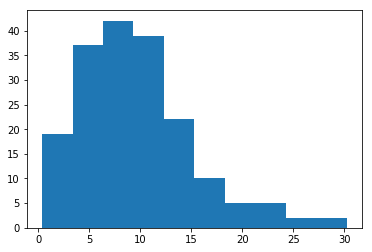

In [128]:
plt.hist(full.BothSexes)

(array([ 2.,  3., 17., 24., 36., 41., 35., 13.,  8.,  4.]),
 array([-0.76149254,  0.06832935,  0.89815124,  1.72797314,  2.55779503,
         3.38761692,  4.21743881,  5.0472607 ,  5.8770826 ,  6.70690449,
         7.53672638]),
 <a list of 10 Patch objects>)

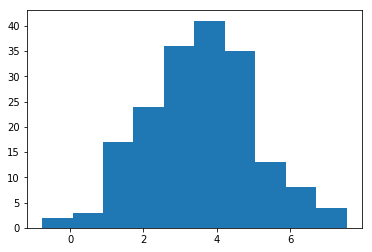

In [129]:
plt.hist(full.bc_BothSexes)

In [131]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Guyana to Barbados
Data columns (total 56 columns):
Continent             183 non-null object
BothSexes             183 non-null float64
MalesNumber           183 non-null float64
FemalesNumber         183 non-null float64
happy                 183 non-null float64
doc_ratio             183 non-null float64
below_pov_line        183 non-null float64
gdp                   183 non-null float64
gdppp                 183 non-null float64
unemp                 183 non-null float64
med_age               183 non-null float64
med_age_male          183 non-null float64
med_age_female        183 non-null float64
homeless              55 non-null float64
birth_sex_ratio       183 non-null float64
total_sex_ratio       183 non-null float64
literacy              183 non-null float64
hum_freedom           183 non-null float64
econ_freedom          183 non-null float64
gen_inequality        183 non-null float64
sunny_hours           183 non-nu

Hey look! I can do other things in Selenium; this is proved through my idiocy thinking that I had to expand tabs to read them, but in any case...

In [ ]:
# def get_wto() :
#     driver.get("https://www.wto.org/english/thewto_e/whatis_e/tif_e/org6_e.htm")
#     sleep(.5)
#     for letter in string.ascii_uppercase :
#         try :
#             collapsed = driver.find_element_by_css_selector(f"a[aria-controls='collapse{letter}']")
#             collapsed.click()
#             sleep(.2)
#             print(letter)
#         except :
#             print('no ',letter)
#             continue